In [16]:
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm
import os
import numpy as np

In [17]:
plt.rcParams['text.usetex']=True
plt.rcParams['font.family']='serif'
plt.rcParams['font.size']=9
plt.rcParams['axes.titlesize']=plt.rcParams['font.size']
plt.rcParams['figure.figsize']=(6.8,4)
plt.rcParams['text.latex.preamble']=r'\usepackage{amsmath,amssymb,physics,bm}'

In [18]:
dirpath = 'class_A_2d'

# Load figure for dynamics of nu and EE

In [68]:
nshell_list = [2,]
L_list = [10,12,14,16,18,20]
es =10
nu_list = {}
EE_list = {}
for L in L_list:
    for nshell in nshell_list:
        with open(os.path.join(dirpath,f'class_A_2D_L{L}_nshell{nshell}_mu1.00_es{es}.pickle'),'rb') as f:
            [nu,EE]=pickle.load(f)
            nu_list[(L,nshell)]=nu
            EE_list[(L,nshell)]=EE


Text(0, 0.5, '$\\abs{\\abs{\\mathcal{C}}-1}$')

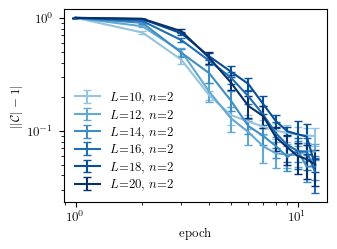

In [12]:
fig,ax=plt.subplots(figsize=(3.4,2.5))
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(L_list))))
for L in L_list:
    for nshell in nshell_list:
        x=np.arange(nu_list[(L,nshell)].shape[1])
        y=nu_list[(L,nshell)].mean(axis=0)
        yerr=nu_list[(L,nshell)].std(axis=0)/np.sqrt(nu_list[(L,nshell)].shape[0])
        ax.errorbar(x=x+1,y=1-np.abs(y),yerr=yerr,label=f'$L$={L}, $n$={nshell}',capsize=3,color=next(color_list))
ax.legend(frameon=False)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('epoch')
ax.set_ylabel(r'$\abs{\abs{\mathcal{C}}-1}$')
# fig.savefig('../Rp_SPTD/Fig/chern_mu1_es10.pdf',bbox_inches='tight')

Text(0, 0.5, 'Entanglement entropy')

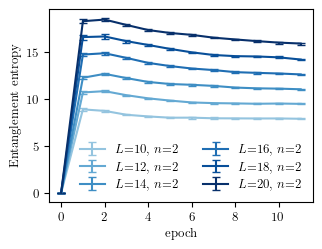

In [13]:
fig,ax=plt.subplots(figsize=(3.4,2.5))  
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(L_list))))
for L in L_list:
    for nshell in nshell_list:
        x=np.arange(EE_list[(L,nshell)].shape[1])
        y=EE_list[(L,nshell)].mean(axis=0)
        yerr=EE_list[(L,nshell)].std(axis=0)/np.sqrt(EE_list[(L,nshell)].shape[0])
        ax.errorbar(x=x,y=y,yerr=yerr,label=f'$L$={L}, $n$={nshell}',capsize=3,color=next(color_list))
ax.legend(frameon=False,ncols=2)
ax.set_xlabel('epoch')
ax.set_ylabel(r'Entanglement entropy')
# (EE_list[10,2]).mean(axis=0)
# fig.savefig('../Rp_SPTD/Fig/EE_mu1_es10.pdf',bbox_inches='tight')

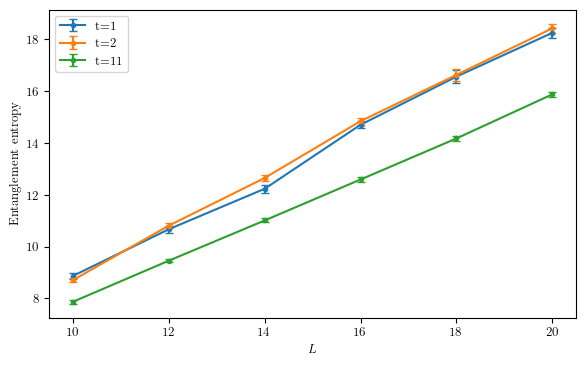

In [ ]:
fig,ax=plt.subplots()
for t in [1,2,11]:
    EE_ss=[EE_list[(L,nshell)].mean(axis=0)[t] for L in L_list]
    EE_ss_sem = [EE_list[(L,nshell)].std(axis=0)[t]/np.sqrt(EE_list[(L,nshell)].shape[0]) for L in L_list]
    ax.errorbar(L_list,EE_ss,yerr=EE_ss_sem,fmt='.-',capsize=3,label=f't={t}')
ax.set_xlabel('$L$')
ax.set_ylabel(r'Entanglement entropy')
ax.legend()
# for L in L_list:
#         x=np.arange(EE_list[(L,nshell)].shape[1])
#         y=EE_list[(L,nshell)].mean(axis=0)
#         yerr=EE_list[(L,nshell)].std(axis=0)/np.sqrt(EE_list[(L,nshell)].shape[0])
#         ax.errorbar(x=x,y=y,yerr=yerr,label=f'$L$={L},$n$={nshell}',capsize=3)
# ax.legend()

In [5]:
nshell = 2
L_list = [10,12,14,16,18,20]
es =10
nu_list_2 = {}
EE_list_2 = {}
mu_list = np.round(np.arange(1,3,0.1),2)
for L in L_list:
    for mu in mu_list:
        with open(os.path.join(dirpath,f'class_A_2D_L{L}_nshell{2}_mu{mu:.2f}_es{es}.pickle'),'rb') as f:
            [nu,EE]=pickle.load(f)
            nu_list_2[(L,mu)]=nu
            EE_list_2[(L,mu)]=EE

Text(0, 0.5, '$\\abs{\\abs{\\mathcal{C}}-1}$')

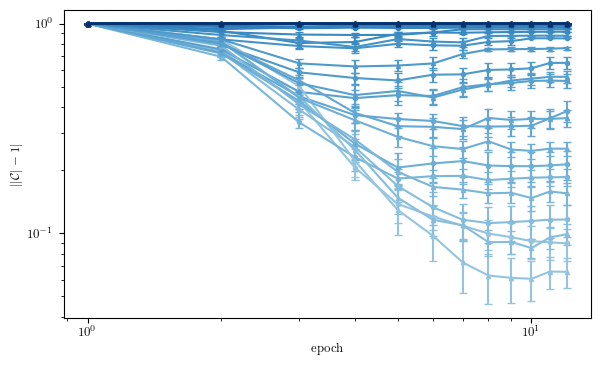

In [41]:
fig,ax=plt.subplots()
# figsize=(3.4,2.5)
marker_list = ['o','^','v','<','>','p','P','*','X','s',]
for L_idx,L in enumerate(L_list):
    color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(mu_list))))
    for mu in mu_list:
        x=np.arange(nu_list_2[(L,mu)].shape[1])
        y=nu_list_2[(L,mu)].mean(axis=0)
        yerr=nu_list_2[(L,mu)].std(axis=0)/np.sqrt(nu_list_2[(L,mu)].shape[0])
        ax.errorbar(x=x+1,y=1-np.abs(y),yerr=yerr,label=f'$L$={L}, $\mu$={mu:.2f}',capsize=3,color=next(color_list),marker=(marker_list)[L_idx],markersize=3)
# ax.legend(frameon=False)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('epoch')
ax.set_ylabel(r'$\abs{\abs{\mathcal{C}}-1}$')

Text(0, 0.5, 'Entanglement entropy')

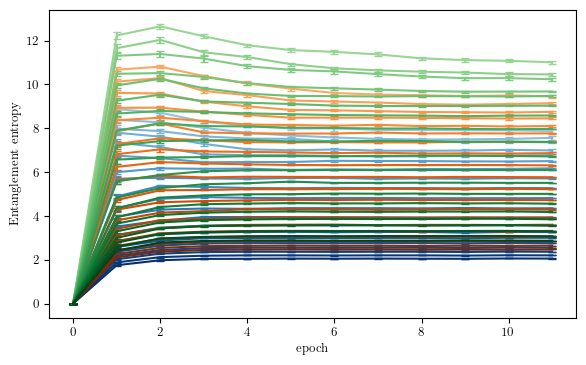

In [57]:
fig,ax=plt.subplots()  
# figsize=(3.4,2.5)

color_list = {10:iter(plt.cm.Blues(np.linspace(0.4,1,len(mu_list)))), 
12:iter(plt.cm.Oranges(np.linspace(0.4,1,len(mu_list)))),
14:iter(plt.cm.Greens(np.linspace(0.4,1,len(mu_list)))),
}
for L_idx,L in enumerate(L_list):
    for mu in mu_list:
        x=np.arange(EE_list_2[(L,mu)].shape[1])
        y=EE_list_2[(L,mu)].mean(axis=0)
        yerr=EE_list_2[(L,mu)].std(axis=0)/np.sqrt(EE_list_2[(L,mu)].shape[0])
        ax.errorbar(x=x,y=y,yerr=yerr,label=f'$L$={L}, $\mu$={mu:.2f}',capsize=3,color=next(color_list[L]))
# ax.legend(frameon=False,ncols=2)
ax.set_xlabel('epoch')
ax.set_ylabel(r'Entanglement entropy')
# (EE_list_2[10,2]).mean(axis=0)
# fig.savefig('../Rp_SPTD/Fig/EE_mu1_es10.pdf',bbox_inches='tight')

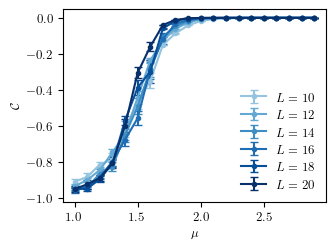

In [79]:
fig,ax=plt.subplots(figsize=(3.4,2.5))
t=11
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(L_list))))
for L in L_list:
    nu_ss=[nu_list_2[(L,mu)].mean(axis=0)[t] for mu in mu_list]
    nu_ss_sem = [nu_list_2[(L,mu)].std(axis=0)[t]/np.sqrt(nu_list_2[(L,mu)].shape[0]) for mu in mu_list]
    ax.errorbar(mu_list,nu_ss,yerr=nu_ss_sem,fmt='.-',capsize=3,label=f'$L={L}$',color=next(color_list))
ax.set_xlabel('$\mu$')
ax.set_ylabel(r'$\mathcal{C}$')
ax.legend(frameon=False)
fig.savefig('../Rp_SPTD/Fig/chern_mu_es10.pdf',bbox_inches='tight')

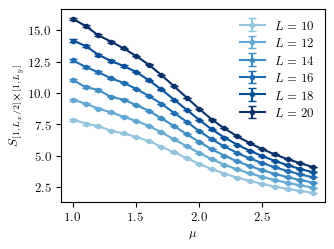

In [15]:
fig,ax=plt.subplots(figsize=(3.4,2.5))
t=11
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(L_list))))

for L in L_list:
    EE_ss=[EE_list_2[(L,mu)].mean(axis=0)[t] for mu in mu_list]
    EE_ss_sem = [EE_list_2[(L,mu)].std(axis=0)[t]/np.sqrt(EE_list_2[(L,mu)].shape[0]) for mu in mu_list]
    ax.errorbar(mu_list,EE_ss,yerr=EE_ss_sem,fmt='.-',capsize=3,label=f'$L={L}$',color=next(color_list))
ax.set_xlabel('$\mu$')
ax.set_ylabel(r'$S_{[1,L_x/2]\cross[1,L_y]}$')

ax.legend(frameon=False)
fig.savefig('../Rp_SPTD/Fig/EE_mu_es10.pdf',bbox_inches='tight')

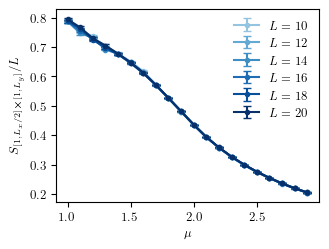

In [14]:
fig,ax=plt.subplots(figsize=(3.4,2.5))
t=11
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(L_list))))

for L in L_list:
    EE_ss=[EE_list_2[(L,mu)].mean(axis=0)[t]/L for mu in mu_list]
    EE_ss_sem = [EE_list_2[(L,mu)].std(axis=0)[t]/np.sqrt(EE_list_2[(L,mu)].shape[0])/L for mu in mu_list]
    ax.errorbar(mu_list,EE_ss,yerr=EE_ss_sem,fmt='.-',capsize=3,label=f'$L={L}$',color=next(color_list))
ax.set_xlabel('$\mu$')
ax.set_ylabel(r'$S_{[1,L_x/2]\cross[1,L_y]}/L$')
ax.legend(frameon=False)
fig.savefig('../Rp_SPTD/Fig/EE_mu_es10_norm.pdf',bbox_inches='tight')

In [97]:
nshell_list = [2,3,4,5]
L_list = [12,14,16,18,20]
es =10
nu_list_3 = {}
EE_list_3 = {}
mu_list = [2.]
for L in L_list:
    for nshell in nshell_list:
        with open(os.path.join(dirpath,f'class_A_2D_L{L}_nshell{nshell}_mu{mu:.2f}_es{es}.pickle'),'rb') as f:
            [nu,EE]=pickle.load(f)
            nu_list_3[(L,nshell)]=nu
            EE_list_3[(L,nshell)]=EE

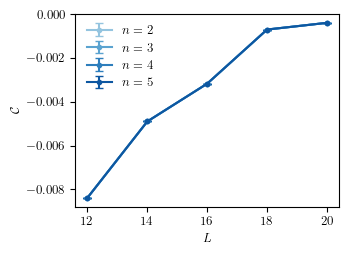

In [98]:
fig,ax=plt.subplots(figsize=(3.4,2.5))
t=11
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(L_list))))
for nshell in nshell_list:
    nu_ss=[nu_list_3[(L,mu)].mean(axis=0)[t] for L in L_list]
    nu_ss_sem = [nu_list_3[(L,mu)].std(axis=0)[t]/np.sqrt(nu_list_3[(L,mu)].shape[0]) for L in L_list]
    ax.errorbar(L_list,nu_ss,yerr=nu_ss_sem,fmt='.-',capsize=3,label=f'$n={nshell}$',color=next(color_list))
ax.set_xlabel('$L$')
ax.set_ylabel(r'$\mathcal{C}$')
ax.legend(frameon=False)
# fig.savefig('../Rp_SPTD/Fig/chern_mu_es10.pdf',bbox_inches='tight')

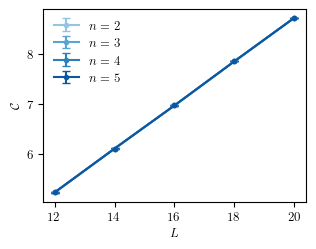

In [99]:
fig,ax=plt.subplots(figsize=(3.4,2.5))
t=11
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(L_list))))
for nshell in nshell_list:
    EE_ss=[EE_list_3[(L,mu)].mean(axis=0)[t] for L in L_list]
    EE_ss_sem = [EE_list_3[(L,mu)].std(axis=0)[t]/np.sqrt(EE_list_3[(L,mu)].shape[0]) for L in L_list]
    ax.errorbar(L_list,EE_ss,yerr=EE_ss_sem,fmt='.-',capsize=3,label=f'$n={nshell}$',color=next(color_list))
ax.set_xlabel('$L$')
ax.set_ylabel(r'$\mathcal{C}$')
ax.legend(frameon=False)
# fig.savefig('../Rp_SPTD/Fig/chern_mu_es10.pdf',bbox_inches='tight')

In [ ]:
EE_list_3